In [12]:
import requests, xmltodict, json
import pandas as pd
import matplotlib.pyplot as plt

key = "2XdTyQg8UpkQZbYwCAI7QOktDUUaH0WRVKLRUQ1rpxkddWw1H2tsG5W1Sg1SzQvygpSUw8pYMtzZgwZkpdKrlQ%3D%3D"
url = "http://apis.data.go.kr/6260000/EnvironmentalNosie/getNoiseInfo?serviceKey={}&pageNo=1&numOfRows=10000".format(key)

content = requests.get(url).content
dict = xmltodict.parse(content)
json_string = json.dumps(dict['response']['body'], ensure_ascii=False)
jsonObj = json.loads(json_string)
# print(jsonObj['items']['item'])
# print(json_string)
# for item in jsonObj['items']['item']:
#     print(item)

df = pd.DataFrame(jsonObj['items']['item'])
df

# df.to_csv('noise.csv', index=False, encoding='utf-8-sig')

,elife06,inspecQt,elife05,elife04,inspecKb2,elife03,inspecKb1,elife02,elife01,inspecArea,inspecKb3,avgnight,avgdaytime,inspecPoint,inspecYy
0,48,2,51,53,종합병원,58,가,58,59,부산진구개금4동백병원주변,일반,49,57,하성약국 옆,2020
1,62,2,67,68,일반주거1,67,나,68,67,기장군기장읍동부리,도로,64,67,기장FILA 앞,2020
2,52,1,55,56,녹지,64,가,63,63,부산진구개금2동백병원주변,도로,53,61,개금2동새마을금고앞,2020
3,54,1,58,61,녹지,64,가,66,65,부산진구개금2동백병원주변,도로,56,64,주원초등학교옆,2020
4,62,2,66,69,일반주거1,69,나,70,69,기장군기장읍동부리,도로,64,69,초이스안경 앞,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,64,4,67,68,일반주거3,72,나,73,71,북구덕천1동,도로,65,71,1동 시영APT입구,2002
4313,48,4,54,56,일반주거3,62,나,60,57,북구덕천1동,일반,51,58,14동 시영APT뒤,2002
4314,49,4,56,58,일반주거3,60,나,61,60,북구덕천1동,일반,52,59,미진골든빌라앞,2002
4315,48,4,54,56,일반주거3,63,나,59,58,북구덕천1동,일반,51,59,시영APT중앙,2002


In [13]:
# 한글 폰트 설정
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 15 columns):
elife06        4317 non-null object
inspecQt       4317 non-null object
elife05        4317 non-null object
elife04        4317 non-null object
inspecKb2      4317 non-null object
elife03        4317 non-null object
inspecKb1      4317 non-null object
elife02        4317 non-null object
elife01        4317 non-null object
inspecArea     4317 non-null object
inspecKb3      4317 non-null object
avgnight       4317 non-null object
avgdaytime     4317 non-null object
inspecPoint    4317 non-null object
inspecYy       4317 non-null object
dtypes: object(15)
memory usage: 506.0+ KB


In [31]:
df['inspecKb1'].value_counts().sort_index()

가    1228
나    1837
다    1252
Name: inspecKb1, dtype: int64

In [35]:
df[['elife01', 'elife02', 'elife03', 'elife04', 'elife05', 'elife06']] = df[['elife01', 'elife02', 'elife03', 'elife04', 'elife05', 'elife06']].astype('float')

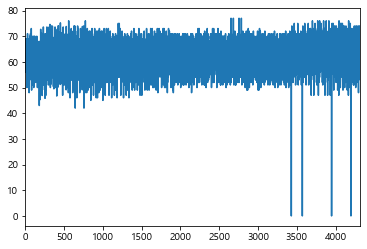

In [36]:
df['elife03'].plot()

In [45]:
df_new = df.groupby(df['inspecKb2']).mean()
df_new

,elife06,elife05,elife04,elife03,elife02,elife01
inspecKb2,,,,,,
녹지,51.039863,54.715753,57.393699,58.534932,58.372329,58.406438
상업,57.674498,59.519769,61.160956,61.928171,61.971334,61.842175
상업지역,59.600000,61.200000,62.600000,63.800000,63.300000,64.200000
일반주거,55.723684,59.105263,61.250000,61.447368,61.302632,61.118421
일반주거1,53.948142,56.947804,59.697297,60.793919,60.150169,59.938345
일반주거2,54.774781,57.367075,60.377233,60.932224,60.836427,60.773205
일반주거3,56.636724,59.126897,61.562931,62.623448,62.232759,62.580517
일반주거4,26.000000,26.000000,27.500000,28.500000,28.000000,28.000000
일반주거5,58.500000,61.000000,61.000000,64.000000,62.000000,63.500000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

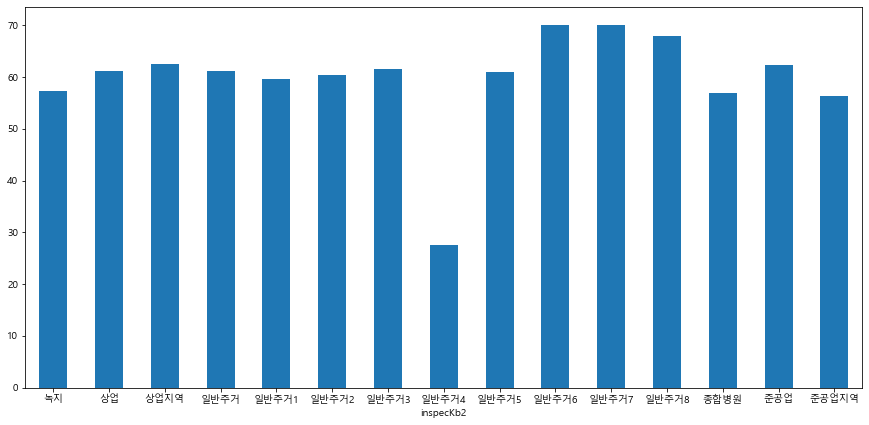

In [50]:
plt.figure(figsize=(15,7))
df_new['elife04'].sort_index().plot(kind='bar')
plt.xticks(rotation=0)